In [1]:
import pyiron_base
pyiron_base.__file__

'/srv/conda/envs/notebook/lib/python3.12/site-packages/pyiron_base/__init__.py'

In [2]:
from pyiron_base import Project
from pyiron_base.project.delayed import draw

In [3]:
pr = Project("test")

In [4]:
pr.remove_jobs(recursive=True, silently=True)

  0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
def add_x_and_y(x, y):
    z = x + y
    return z

In [6]:
def add_x_and_y_and_z(x, y, z):
    w = x + y + z
    return w

In [7]:
pr.remove_jobs(recursive=True, silently=True)

0it [00:00, ?it/s]

In [8]:
z = pr.wrap_python_function(python_function=add_x_and_y, x=1, y=2, delayed=True)

In [9]:
w = pr.wrap_python_function(python_function=add_x_and_y_and_z, x=1, y=2, z=z, delayed=True)
w.result()

The job add_x_and_yd1e66f7e16af31e9a022eef17b79dee7 was saved and received the ID: 1
The job add_x_and_y_and_zd503352d72be7e7aa722de3e3fd9e89b was saved and received the ID: 2


6

In [10]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,1,finished,None,add_x_and_yd1e66f7e16af31e9a022eef17b79dee7,/add_x_and_yd1e66f7e16af31e9a022eef17b79dee7,None,/home/jovyan/test/,2024-07-03 06:46:12.656451,None,None,pyiron@jupyter-pyiron-2ddev-2dcomp-2dworkflow-2dgraphs-2d3nzzidwe#1,PythonFunctionContainerJob,0.4,None,None
1,2,finished,None,add_x_and_y_and_zd503352d72be7e7aa722de3e3fd9e89b,/add_x_and_y_and_zd503352d72be7e7aa722de3e3fd9e89b,None,/home/jovyan/test/,2024-07-03 06:46:12.855830,None,None,pyiron@jupyter-pyiron-2ddev-2dcomp-2dworkflow-2dgraphs-2d3nzzidwe#1,PythonFunctionContainerJob,0.4,None,None


In [11]:
w = pr.wrap_python_function(python_function=add_x_and_y_and_z, x=1, y=2, z=z, delayed=True)
w.result()

2024-07-03 06:46:13,146 - pyiron_log - WARNING - The job add_x_and_y_and_zd503352d72be7e7aa722de3e3fd9e89b is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


6

In [12]:
nodes_dict, edges_lst = w.get_graph()
nodes_dict, edges_lst

({'create_function_job_f396412853e52ce665b052689efd923b_f396412853e52ce665b052689efd923b': <pyiron_base.project.delayed.DelayedObject at 0x7f1fba36a450>,
  'x_1d847da32ecaabf6731c38f798c3d4ce': 1,
  'y_a9ec4f5f33f0d64e74ed5d9900bceac6': 2,
  'create_function_job_71a0ddc9ff299d3df192b56892a20205_71a0ddc9ff299d3df192b56892a20205': <pyiron_base.project.delayed.DelayedObject at 0x7f1fba31cf20>},
 [['create_function_job_f396412853e52ce665b052689efd923b_f396412853e52ce665b052689efd923b',
   'x_1d847da32ecaabf6731c38f798c3d4ce'],
  ['create_function_job_f396412853e52ce665b052689efd923b_f396412853e52ce665b052689efd923b',
   'y_a9ec4f5f33f0d64e74ed5d9900bceac6'],
  ['create_function_job_f396412853e52ce665b052689efd923b_f396412853e52ce665b052689efd923b',
   'create_function_job_71a0ddc9ff299d3df192b56892a20205_71a0ddc9ff299d3df192b56892a20205'],
  ['create_function_job_71a0ddc9ff299d3df192b56892a20205_71a0ddc9ff299d3df192b56892a20205',
   'x_1d847da32ecaabf6731c38f798c3d4ce'],
  ['create_functio

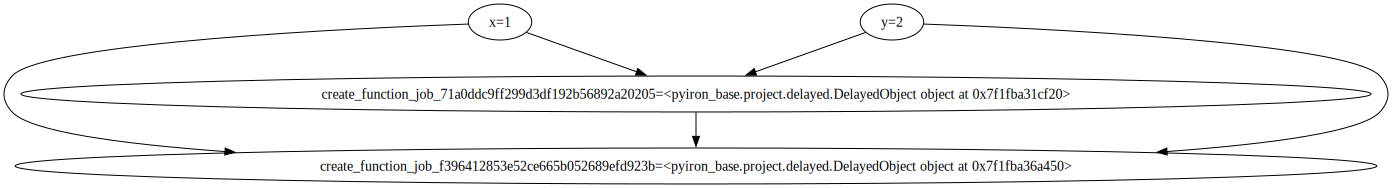

In [13]:
draw(node_dict=nodes_dict, edge_lst=edges_lst)